We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

In [81]:
import pandas as pd
import numpy as np
import certifi
import ssl
import urllib.request

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
ssl_context = ssl.create_default_context(cafile=certifi.where())
with urllib.request.urlopen(url, context=ssl_context) as response:
    churn_df = pd.read_csv(response)
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [82]:
# DATA PREPARATION
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

,tenure,age,address,income,ed,employ,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0
...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,1


In [83]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ']])
print('X: ',X[0:5])
y = np.asarray(churn_df['churn'])
print('---' * 20)
print('y: ', y[0:5])
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]
print('---' * 20)
print('X_norm: ', X_norm[0:5])

X:  [[ 11.  33.   7. 136.   5.   5.]
 [ 33.  33.  12.  33.   2.   0.]
 [ 23.  30.   9.  30.   1.   2.]
 [ 38.  35.   5.  76.   2.  10.]
 [  7.  35.  14.  80.   2.  15.]]
------------------------------------------------------------
y:  [1 1 0 0 0]
------------------------------------------------------------
X_norm:  [[-1.13518441 -0.62595491 -0.4588971   0.4751423   1.6961288  -0.58477841]
 [-0.11604313 -0.62595491  0.03454064 -0.32886061 -0.6433592  -1.14437497]
 [-0.57928917 -0.85594447 -0.261522   -0.35227817 -1.42318853 -0.92053635]
 [ 0.11557989 -0.47262854 -0.65627219  0.00679109 -0.6433592  -0.02518185]
 [-1.32048283 -0.47262854  0.23191574  0.03801451 -0.6433592   0.53441472]]


In [84]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

model = LogisticRegression().fit(X_train,y_train)
yhat = model.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [85]:
yhat_prob = model.predict_proba(X_test)
yhat_prob[:10]

array([[0.83176135, 0.16823865],
       [0.90923185, 0.09076815],
       [0.80668816, 0.19331184],
       [0.89769641, 0.10230359],
       [0.75685775, 0.24314225],
       [0.63971421, 0.36028579],
       [0.54536777, 0.45463223],
       [0.89628447, 0.10371553],
       [0.36242837, 0.63757163],
       [0.91797445, 0.08202555]])

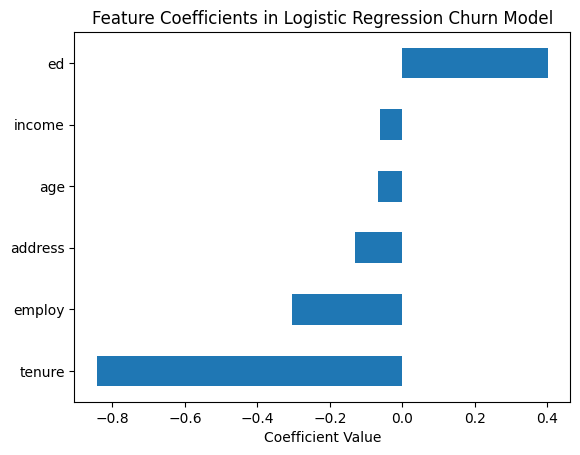

In [86]:
coefficients = pd.Series(model.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. The lower the log loss value, the better the model is considered to be.

In [87]:
# PERFORMANCE EVALUATION
log_loss(y_test, yhat_prob)

0.530242735024537